<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/10nov/REgresion_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import random

Cargamos los datos que vamos a trabajar.

In [5]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
filess=glob.glob('/content/drive/MyDrive/Cosas ML/train/*')

In [6]:
files = random.sample(filess, len(filess))

In [7]:
len(files)

4340

In [8]:
#numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes

Preparamos el dataset de entrenamiento.

In [9]:
train_x=[]
train_y=[]
for file in files[:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

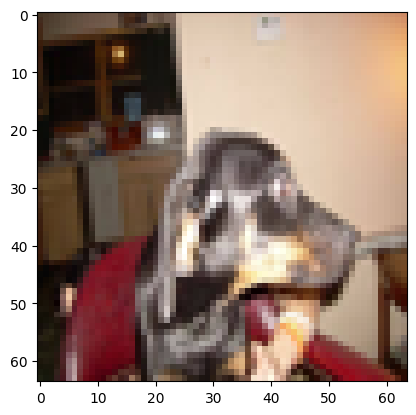

In [10]:
plt.imshow(train_x[0])


Preparamos el dataset de prueba

In [11]:
test_x=[]
test_y=[]
for file in files[4240:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

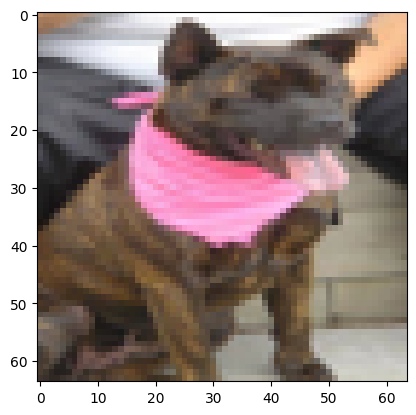

In [12]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [13]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [14]:
np.shape(train_set_y)

(1, 100)

In [15]:
1/len(train_set_y[0,:])

0.01

In [16]:
test_set_y

array([[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]])

Normalizamos las imágenes

In [17]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

Ya esta listo nuestro set de datos para poder trabajar con el.

In [18]:
np.shape(train_set_x)

(12288, 100)

In [19]:
#y_hat
def y_gorrito(z):
  sig = 1/(1+np.exp(-(z)))
  return sig

In [40]:
#Calculo del costo
def costo(y_hat,y):
  y=np.squeeze(y)
  cst = -(1/len(y))*(np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))
  return cst

In [41]:
#Gradiente Descendiente
def  grad(alph,x,y,iter):
  y=np.squeeze(y)
  cost=[]
  w = np.zeros(train_set_x.shape[0])
  b = 0
  z=w@x+b
  for i in range(iter):
    w=w-alph*(1/len(y))*x@(y_gorrito(z)-y)
    b=b-alph*(1/len(y))*np.sum(y_gorrito(z)-y)
    cost.append(costo(y_gorrito(z),y))
    z=w@x+b
  return w,b,cost

In [47]:
w,b,costot = grad(1e-2,train_set_x,train_set_y, 10000)

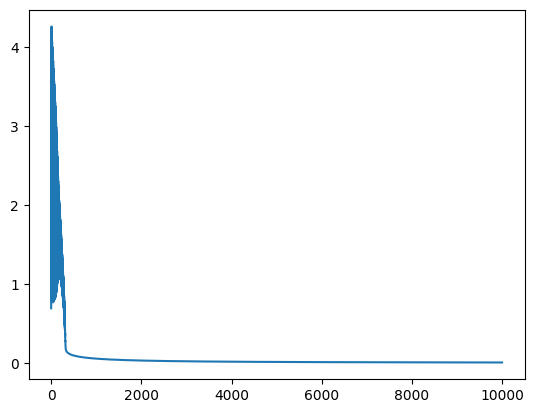

In [52]:
plt.plot(range(10000),costot)

In [53]:
np.shape(w)

(12288,)

In [55]:
z=w@test_set_x+b

In [58]:
def test(z):
  tes = y_gorrito(z)

  tes[tes > .5] = 1
  tes[tes < .5] = 0

  return tes

In [61]:
Testt = test(z)

In [60]:
test_set_y

array([[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]])

In [98]:
k=0
for i in range(len(test_set_y[0,:])):
  if Testt[i] == test_set_y[:,i]:
    k += 1
percentage = k/len(test_set_y[0,:])

In [101]:
print(" El porcentaje de acierto es de :", percentage)

 El porcentaje de acierto es de : 0.49
